In [33]:
!pip install numpy pandas matplotlib seaborn plotly requests tqdm opencv-python pillow wandb -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


## Download and install Pytorch

In [34]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://download.pytorch.org/whl/cu113


In [35]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf --no-check-certificate


--2024-02-26 15:04:33--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/x-font-ttf]
Saving to: ‘SimHei.ttf.1’

SimHei.ttf.1        100%[===================>]   9.58M  20.9MB/s    in 0.5s    

2024-02-26 15:04:34 (20.9 MB/s) - ‘SimHei.ttf.1’ saved [10050868/10050868]



## Create a catalogue

In [36]:
import os

In [37]:
# Store the results file
# os.mkdir('output')

# Store the trained model weights
os.mkdir('checkpoint')


# Store the generated charts
os.mkdir('diagrams')

## Setting matplotlib Chinese and English fonts

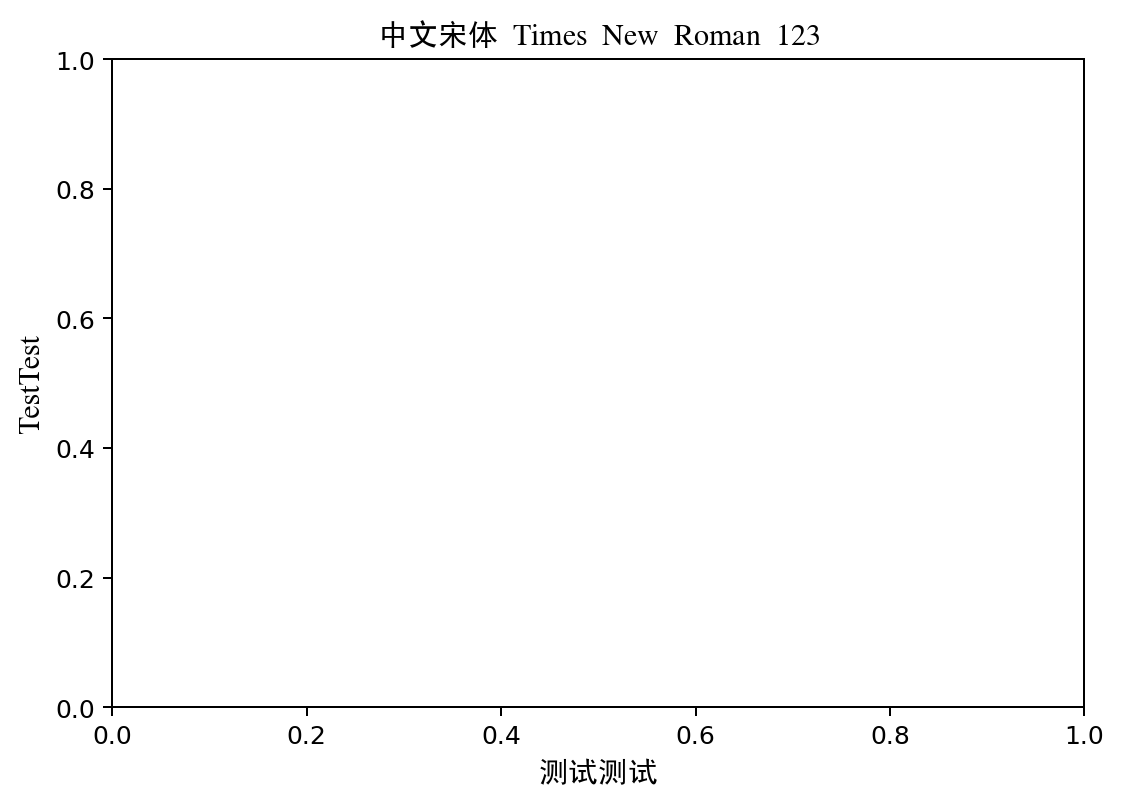

In [38]:
## Font Environment Settings
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
 
# global font settings
SimSun = FontProperties(fname='/home/featurize/SimHei.ttf')  # Used to display Chinese labels normally
plt.rcParams['axes.unicode_minus'] = False  # Used to display the negative sign normally
Times_New_Roman = FontProperties(fname='/home/featurize/times.ttf')
 
# mixed font settings
config = {
#     "font.family":'serif',
#     "font.size": 80,
       "mathtext.fontset":'stix',
#     "font.serif": ['SimSun'],
}
rcParams.update(config)
 
#Canvas Settings
fig = plt.figure(num=1, figsize=(9, 6),dpi=180)
ax = plt.axes((0.23,0.23,0.6,0.6))
 
 
# Application of font effects 
ax.set_title('中文宋体 $\mathrm{Times}$ $\mathrm{New}$ $\mathrm{Roman}$ $\mathrm{123}$'\
                                           ,fontproperties=SimSun,fontsize=12)  
 
ax.set_xlabel('测试测试',fontproperties=SimSun,fontsize=12)                      
 
ax.set_ylabel('TestTest',fontproperties=Times_New_Roman,fontsize=12)            
 
 
plt.show()

In [42]:
!sudo snap install tree

snap "tree" is already installed, see 'snap help refresh'


In [17]:
!tree /home/featurize/data -L 2

/home/featurize/data
├── fruit25_split.zip
├── train
│   ├── CherryTomatoes
│   ├── Mangosteen
│   ├── MomordicaCharantia
│   ├── NavelOrange
│   ├── Sandsugaroranges
│   ├── apple
│   ├── banana
│   ├── carrot
│   ├── cherries
│   ├── cucumber
│   ├── durian
│   ├── grape
│   ├── hamimelon
│   ├── kiwi
│   ├── lemon
│   ├── lichee
│   ├── longan
│   ├── mango
│   ├── pear
│   ├── pineapple
│   ├── pitaya
│   ├── pomegranate
│   ├── strawberry
│   ├── tomato
│   └── watermelon
└── val
    ├── Cherrytomatoes
    ├── Mangosteen
    ├── MomordicaCharantia
    ├── NavelOrange
    ├── Sandsugaroranges
    ├── apple
    ├── banana
    ├── carrot
    ├── cherries
    ├── cucumber
    ├── durian
    ├── grape
    ├── hamimelon
    ├── kiwi
    ├── lemon
    ├── lichee
    ├── longan
    ├── mango
    ├── pear
    ├── pineapple
    ├── pitaya
    ├── pomegranate
    ├── strawberry
    ├── tomato
    └── watermelon

52 directories, 1 file


In [19]:
import time
import os

import numpy as np
from tqdm import tqdm

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [20]:
# test cpu
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device', device)

device cuda:0


In [21]:
from torchvision import transforms

# Training Set Image Preprocessing - RCTN: Scaling, Cropping, Turn Tensor, Normalisation
train_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                     ])

# Test Set Image Preprocessing - RCTN: Scaling, Cropping, Turn Tensor, Normalisation
test_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(
                                         mean=[0.485, 0.456, 0.406], 
                                         std=[0.229, 0.224, 0.225])
                                    ])

In [37]:
# Dataset folder path
dataset_dir = '/home/featurize/data'

In [70]:
train_path = os.path.join(dataset_dir, 'train')
test_path = os.path.join(dataset_dir, 'val')
print('Training_set_path', train_path)
print('Testing_set_path', test_path)

Training_set_path /home/featurize/data/train
Testing_set_path /home/featurize/data/val


In [79]:
from torchvision import datasets

# Load training set
train_dataset = datasets.ImageFolder(train_path, train_transform)

# Load Test Set
test_dataset = datasets.ImageFolder(test_path, test_transform)

In [71]:
print('Number of images in the training set', len(train_dataset))
print('Number of categories', len(train_dataset.classes))
print('Name of each category', train_dataset.classes)

Number of images in the training set 3649
Number of categories 25
Name of each category ['CherryTomatoes', 'Mangosteen', 'MomordicaCharantia', 'NavelOrange', 'Sandsugaroranges', 'apple', 'banana', 'carrot', 'cherries', 'cucumber', 'durian', 'grape', 'hamimelon', 'kiwi', 'lemon', 'lichee', 'longan', 'mango', 'pear', 'pineapple', 'pitaya', 'pomegranate', 'strawberry', 'tomato', 'watermelon']


In [72]:
print('Number of test set images', len(test_dataset))
print('Number of categories', len(test_dataset.classes))
print('Name of each category', test_dataset.classes)

Number of test set images 898
Number of categories 25
Name of each category ['Cherrytomatoes', 'Mangosteen', 'MomordicaCharantia', 'NavelOrange', 'Sandsugaroranges', 'apple', 'banana', 'carrot', 'cherries', 'cucumber', 'durian', 'grape', 'hamimelon', 'kiwi', 'lemon', 'lichee', 'longan', 'mango', 'pear', 'pineapple', 'pitaya', 'pomegranate', 'strawberry', 'tomato', 'watermelon']


In [73]:
# Name of each category
class_names = train_dataset.classes
n_class = len(class_names)

In [74]:
class_names

['CherryTomatoes',
 'Mangosteen',
 'MomordicaCharantia',
 'NavelOrange',
 'Sandsugaroranges',
 'apple',
 'banana',
 'carrot',
 'cherries',
 'cucumber',
 'durian',
 'grape',
 'hamimelon',
 'kiwi',
 'lemon',
 'lichee',
 'longan',
 'mango',
 'pear',
 'pineapple',
 'pitaya',
 'pomegranate',
 'strawberry',
 'tomato',
 'watermelon']

In [75]:
# Mapping relationship: category to index number
train_dataset.class_to_idx

{'CherryTomatoes': 0,
 'Mangosteen': 1,
 'MomordicaCharantia': 2,
 'NavelOrange': 3,
 'Sandsugaroranges': 4,
 'apple': 5,
 'banana': 6,
 'carrot': 7,
 'cherries': 8,
 'cucumber': 9,
 'durian': 10,
 'grape': 11,
 'hamimelon': 12,
 'kiwi': 13,
 'lemon': 14,
 'lichee': 15,
 'longan': 16,
 'mango': 17,
 'pear': 18,
 'pineapple': 19,
 'pitaya': 20,
 'pomegranate': 21,
 'strawberry': 22,
 'tomato': 23,
 'watermelon': 24}

In [76]:
# Mapping relationship: index number to category
idx_to_labels = {y:x for x,y in train_dataset.class_to_idx.items()}

In [77]:
idx_to_labels

{0: 'CherryTomatoes',
 1: 'Mangosteen',
 2: 'MomordicaCharantia',
 3: 'NavelOrange',
 4: 'Sandsugaroranges',
 5: 'apple',
 6: 'banana',
 7: 'carrot',
 8: 'cherries',
 9: 'cucumber',
 10: 'durian',
 11: 'grape',
 12: 'hamimelon',
 13: 'kiwi',
 14: 'lemon',
 15: 'lichee',
 16: 'longan',
 17: 'mango',
 18: 'pear',
 19: 'pineapple',
 20: 'pitaya',
 21: 'pomegranate',
 22: 'strawberry',
 23: 'tomato',
 24: 'watermelon'}

In [78]:
# Save as local npy file
np.save('idx_to_labels.npy', idx_to_labels)
np.save('labels_to_idx.npy', train_dataset.class_to_idx)

## Define the data loader DataLoader

In [52]:
from torch.utils.data import DataLoader

In [53]:
BATCH_SIZE = 32

# Data loader for the training set
train_loader = DataLoader(train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          num_workers=4
                         )

# Data Loader for Test Sets
test_loader = DataLoader(test_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False,
                         num_workers=4
                        )

## View images and annotations for a batch

In [54]:
# DataLoader is a python generator that returns a batch of data per call.
images, labels = next(iter(train_loader))

In [55]:
images.shape

torch.Size([32, 3, 224, 224])

In [56]:
labels

tensor([16, 16, 10,  1, 24,  3,  4,  4, 17, 23,  3,  3, 15,  8, 19, 12,  1, 10,
        19,  4, 18,  3, 18,  4,  5, 16, 24,  0,  8, 20, 24, 11])

## Visualising a batch of images and annotations

In [57]:
# Converting the Tensor tensor in a dataset to numpy's array data type
images = images.numpy()

In [58]:
images[5].shape

(3, 224, 224)

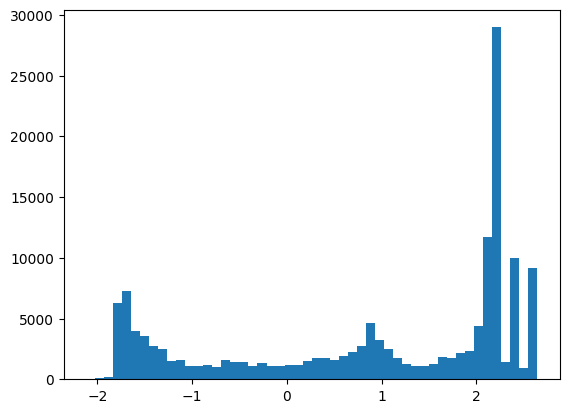

In [59]:
plt.hist(images[5].flatten(), bins=50)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'label:10')

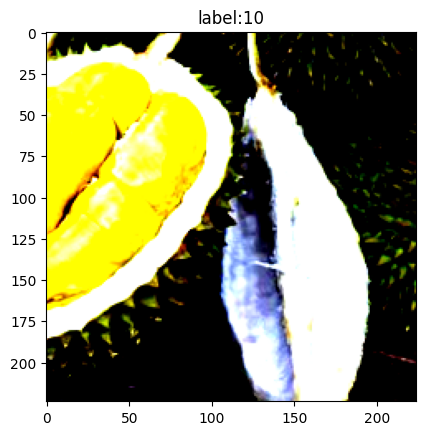

In [60]:
# Preprocessed images in batch
idx = 2
plt.imshow(images[idx].transpose((1,2,0))) # 转为(224, 224, 3)
plt.title('label:'+str(labels[idx].item()))

In [61]:
label = labels[idx].item()

In [62]:
label

10

In [63]:
pred_classname = idx_to_labels[label]

In [64]:
pred_classname

'durian'

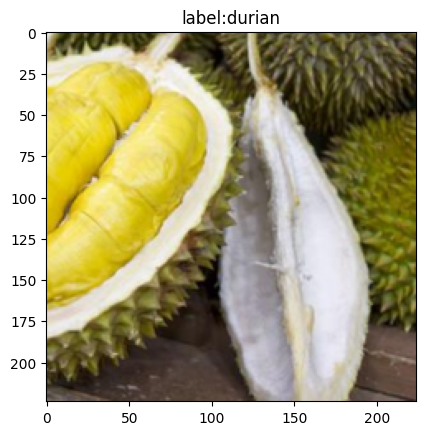

In [65]:
# original image
idx = 2
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.imshow(np.clip(images[idx].transpose((1,2,0)) * std + mean, 0, 1))
plt.title('label:'+ pred_classname)
plt.show()

## Toolkit to be used for importing training

In [66]:
from torchvision import models
import torch.optim as optim

##  Randomly initialise all weights of the model and train all layers from scratch

In [68]:
model = models.resnet18(pretrained=False) # Load only the model structure, not the pre-training weight parameters

model.fc = nn.Linear(model.fc.in_features, n_class)

optimizer = optim.Adam(model.parameters())

##  Training configuration

In [80]:
model = model.to(device)

# Cross Entropy Loss Function
criterion = nn.CrossEntropyLoss() 

# Training rounds Epoch
EPOCHS = 20

In [81]:
# Get a batch of data and annotations
images, labels = next(iter(train_loader))
images = images.to(device)
labels = labels.to(device)

In [82]:
# Input model to perform forward prediction
outputs = model(images)

In [83]:
# Get the predicted category logit scores for all images in the current batch
outputs.shape

torch.Size([32, 25])

In [84]:
# From logit, calculate the average cross-entropy loss function for each sample in the current batch.
loss = criterion(outputs, labels)

In [85]:
optimizer.zero_grad() # Clearing the gradient
loss.backward() # backward propagation
optimizer.step() # Optimisation Updates

In [86]:
# Get the prediction categories for all images in the current batch
_, preds = torch.max(outputs, 1)

In [87]:
preds

tensor([13, 14, 19,  3, 14,  9,  3, 19, 10, 14, 19, 19, 14, 13, 12, 21,  3, 19,
        15, 14, 14, 19,  3, 14,  3, 15, 19, 13,  3, 13, 14,  3],
       device='cuda:0')

In [88]:
labels

tensor([23, 15, 10, 24, 15,  3,  9, 15, 17,  0,  5,  1, 24,  0, 21, 14,  6, 13,
        24, 19,  0, 10, 10,  0, 19, 10, 23,  2, 12, 22,  1,  2],
       device='cuda:0')

## Run the full training

In [94]:
# Iterate through each EPOCH
for epoch in tqdm(range(EPOCHS)):

    model.train()

    for images, labels in train_loader:  # Get a batch of the training set with data and annotations
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)           # Forward Prediction, get the prediction for the current batch.
        loss = criterion(outputs, labels) # Compare the predictions with the annotations and calculate the cross-entropy loss function for the current batch.
        
        optimizer.zero_grad()
        loss.backward()                   # Loss function back propagation of neural network weights to find gradient
        optimizer.step()                  # Optimisation to update neural network weights

100%|██████████| 20/20 [01:46<00:00,  5.33s/it]


## Initial testing on a test set

In [95]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in tqdm(test_loader): # Get a batch of the test set with data and annotations
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)              # Forward prediction, get the prediction confidence of the current batch
        _, preds = torch.max(outputs, 1)     # Obtain the category corresponding to the maximum confidence level as the prediction result
        total += labels.size(0)
        correct += (preds == labels).sum()   # Number of correct samples predicted

    print('The accuracy on the test set is {:.3f} %'.format(100 * correct / total))

100%|██████████| 29/29 [00:01<00:00, 17.24it/s]

The accuracy on the test set is 62.695 %


In [96]:
torch.save(model, 'checkpoint/fruit25_pytorch_xintian.pth')